In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\yuvraj\Downloads\movie_data\movies.csv")
df1=pd.read_csv(r"C:\Users\yuvraj\Downloads\movie_data\ratings.csv")
df2=pd.read_csv(r"C:\Users\yuvraj\Downloads\movie_data\links.csv")
df3=pd.read_csv(r"C:\Users\yuvraj\Downloads\movie_data\tags.csv")

In [3]:
df.shape

(9742, 3)

In [5]:
df1.shape

(100836, 4)

In [11]:
df1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [31]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
#How many unique userId in rating table
df1.userId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [17]:
max_mov=df1.loc[df1['rating'].idxmax()]
print(f"Max Movie {max_mov['movieId']}")

Max Movie 47.0


In [20]:
merge=pd.merge(df,df1,on='movieId',how='inner')
merge.to_csv('mer_data.csv',index=False)

In [32]:
merge_tag=pd.merge(df,df3,on='movieId',how='inner')
merge_tag.to_csv('merTAG_data.csv',index=False)

In [33]:
merge_tag.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [22]:
merge.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [24]:
fight=merge[merge['title']=='Fight Club (1999)']

(array([ 3.,  0.,  1.,  5.,  3., 10., 17., 49., 49., 81.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

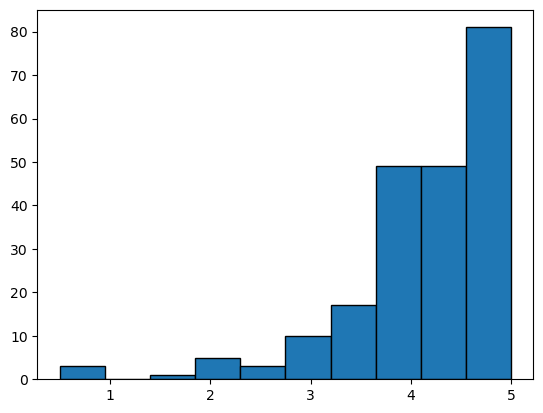

In [28]:
plt.hist(fight['rating'],bins=10,edgecolor='black')

In [35]:
aggri=merge.groupby('movieId')['rating'].agg(['count','mean'])

In [36]:
print(aggri)

         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429
...        ...       ...
193581       1  4.000000
193583       1  3.500000
193585       1  3.500000
193587       1  3.500000
193609       1  4.000000

[9724 rows x 2 columns]


In [72]:
new_data=pd.merge(merge,aggri,on='movieId',how='inner')
new_data.to_csv('IMP_data.csv',index=False)

In [56]:
merge.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [58]:
merge.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64

In [60]:
merge.groupby('title')['rating'].max().sort_values(ascending=False).head()

title
Harry Potter and the Order of the Phoenix (2007)    5.0
Ever After: A Cinderella Story (1998)               5.0
Mystery Science Theater 3000: The Movie (1996)      5.0
Tremors (1990)                                      5.0
Mystery Men (1999)                                  5.0
Name: rating, dtype: float64

In [61]:
sifi=merge[merge['genres'].str.contains('Sci-Fi',case=False,na=False)]

In [62]:
sifi

,movieId,title,genres,userId,rating,timestamp
1286,24,Powder (1995),Drama|Sci-Fi,6,4.0,845554397
1287,24,Powder (1995),Drama|Sci-Fi,32,3.0,856737205
1288,24,Powder (1995),Drama|Sci-Fi,71,2.0,864740028
1289,24,Powder (1995),Drama|Sci-Fi,111,2.5,1518640854
1290,24,Powder (1995),Drama|Sci-Fi,181,3.0,845470571
...,...,...,...,...,...,...
100806,188301,Ant-Man and the Wasp (2018),Action|Adventure|Comedy|Fantasy|Sci-Fi,596,4.0,1535709468
100816,189547,Iron Soldier (2010),Action|Sci-Fi,210,1.0,1528486011
100818,190183,The Darkest Minds (2018),Sci-Fi|Thriller,50,3.5,1533302021
100825,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,184,4.5,1537109489


In [73]:
rt_ct=sifi.groupby('title')['movieId'].size()

In [74]:
sortedm=rt_ct.sort_values(ascending=False)

In [75]:
sortedm

title
Matrix, The (1999)                                             278
Star Wars: Episode IV - A New Hope (1977)                      251
Jurassic Park (1993)                                           238
Terminator 2: Judgment Day (1991)                              224
Star Wars: Episode V - The Empire Strikes Back (1980)          211
                                                              ... 
Solyaris (1968)                                                  1
Man in the White Suit, The (1951)                                1
D.A.R.Y.L. (1985)                                                1
Dark Star (1974)                                                 1
Last Man on Earth, The (Ultimo uomo della Terra, L') (1964)      1
Name: movieId, Length: 978, dtype: int64